# 1. Frame

A Portuguese Bank wants to run a direct marketing campaign to sell its new term deposit plan. The goal is to help them identify customers who would most likely buy the plan?

**Open Discussion** How to approach this problem?

# 2. Acquire

UCI has a number of datasets related to machine learning. We will leverage the Bank Marketing dataset.
Look into this link for more information
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

**Load the train and test datasets**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [27]:
# Load the train dataset
train = pd.read_csv("../Data/train.csv")

In [9]:
# Load the test dataset


In [8]:
# View the first 5 records of train
train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [10]:
# View the first 5 records of test


age            job   marital  education default  balance housing loan  \
0   38  self-employed    single  secondary      no      677     yes   no   
1   58    blue-collar   married    primary      no     5445     yes   no   
2   55        retired   married  secondary      no        5      no   no   
3   26     management    single  secondary      no       63      no   no   
4   48     technician  divorced   tertiary      no      907      no  yes   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  cellular   14   may       114         2     -1         0  unknown      no  
1  cellular   14   apr       391         1     -1         0  unknown      no  
2   unknown   20   jun       108         1     -1         0  unknown      no  
3  cellular   28   jul        76         4     -1         0  unknown      no  
4  cellular    4   aug       103         1     -1         0  unknown      no

In [12]:
# List the attributes/feature names/columns in train dataset
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
# List the attributes in test dataset. 
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [28]:
# Do they match with train?



[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

# Attribute Information:

## Input variables:

### bank client data:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
 y - has the client subscribed a term deposit? (binary: 'yes','no')

# 3. Explore

In [46]:
# Find unique values in deposit for train dataset

pd.unique(train.deposit)

array(['no', 'yes'], dtype=object)

In [47]:
# Find unique values in deposit for test dataset. Are they the same? 


array(['no', 'yes'], dtype=object)

In [29]:
# Find frequency of deposit in train dataset

train.deposit.value_counts()

no     31092
yes     4119
Name: deposit, dtype: int64

In [30]:
# Find frequency of deposit in test dataset



no     8830
yes    1170
Name: deposit, dtype: int64

In [37]:
# Is the distribution of deposit similar in train and test?


train: 13.2477807796
test: 13.2502831257


In [38]:
# Find number of rows and columns in train 
train.shape

(35211, 17)

In [39]:
# Find number of rows and columns in test


(10000, 17)

In [54]:
# Find number of 0 and 1 in labels


(array([0, 1]), array([31092,  4119]))

### Find basic summary metrics for the train dataframe


age        balance           day      duration      campaign  \
count  35211.000000   35211.000000  35211.000000  35211.000000  35211.000000   
mean      40.965153    1355.947914     15.802221    258.191048      2.759337   
std       10.651197    3060.839946      8.339288    257.335241      3.098252   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      71.000000      8.000000    103.000000      1.000000   
50%       39.000000     447.000000     16.000000    180.000000      2.000000   
75%       48.000000    1418.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  35211.000000  35211.000000  
mean      40.104087      0.582659  
std      100.220917      2.418828  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

*Where did the remaining columns go? *

## Plots

In [123]:
# Create labels: that has 0 for No and 1 for Yes in train dataset
labels = np.where(train.deposit=="no", 0, 1)

In [124]:
# Display number of 0 and 1 - check if it is the same as what we saw above?
np.unique(labels, return_counts=True)

(array([0, 1]), array([31092,  4119]))

### Bi-variate plot : Deposit vs age

In [72]:
bivariate_plot_deposit_age = train.loc[:,["deposit", "age"]].copy()

In [74]:
bivariate_plot_deposit_age.head()

deposit  age
0      no   58
1      no   44
2      no   33
3      no   47
4      no   33

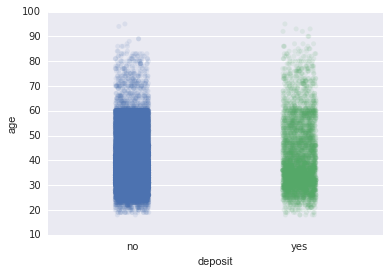

In [81]:
sns.stripplot(x="deposit", y = "age", data = bivariate_plot_deposit_age, jitter = True, alpha = 0.1)

### Multivariate plot : `Deposit` vs `age` and `pdays`

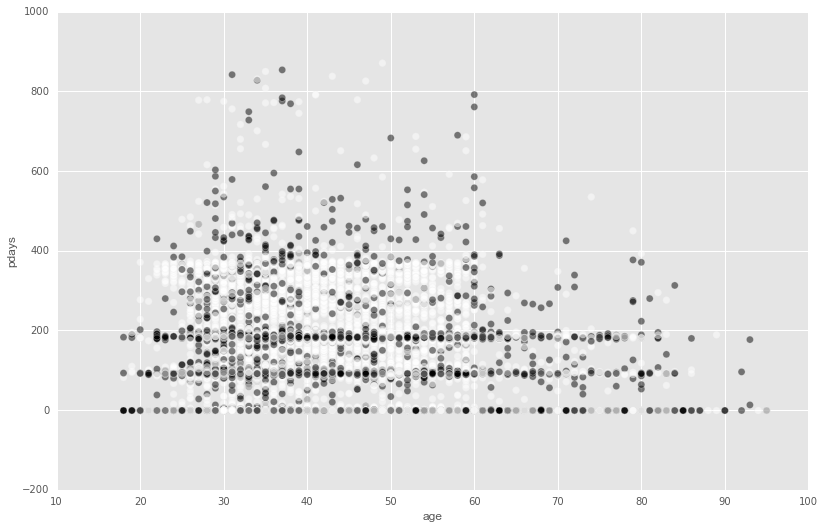

In [119]:
train.plot(kind="scatter", x = 'age', y = 'pdays', color = labels, alpha = 0.5, s=50)

### Multivariate plot : `Deposit` vs `day` and `duration`

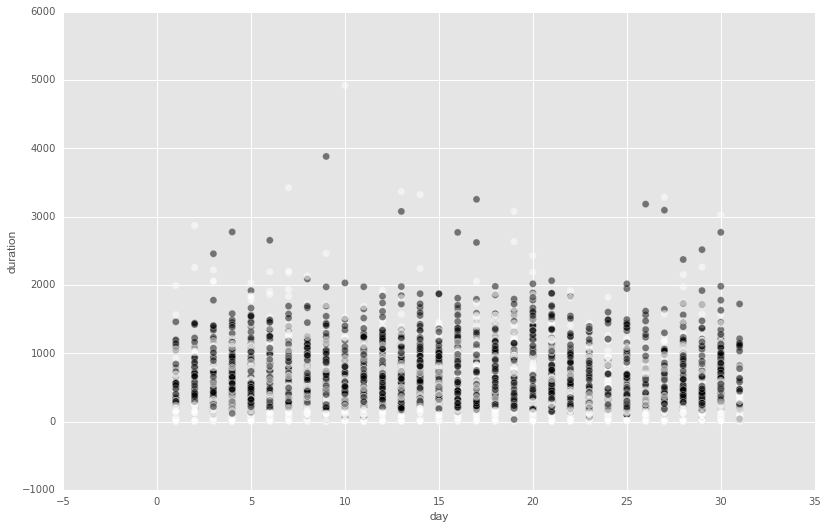

# 4. Refine

#### covert categorical variables to numeric

Two options:
1. Label Encoder
2. One-Hot Encoding

#### Label Encoding

In [131]:
import sklearn
from sklearn import preprocessing

In [ ]:
# Find the columns that are categorical


In [150]:
train_to_convert = train.select_dtypes(include=["object_"]).copy()

In [151]:
train_np = np.array(train_to_convert)

In [153]:
for i in range(train_np.shape[1]):
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_np[:, i]))
    train_np[:,i] = lbl.transform(train_np[:, i])

In [154]:
# Display train_np
train_np

array([[4, 1, 2, ..., 8, 3, 0],
       [9, 2, 1, ..., 8, 3, 0],
       [2, 1, 1, ..., 8, 3, 0],
       ..., 
       [5, 1, 1, ..., 9, 2, 1],
       [1, 1, 1, ..., 9, 3, 0],
       [2, 1, 1, ..., 9, 1, 0]], dtype=object)

In [139]:
# How would you transform test?

In [157]:
#Code here







In [158]:
train_np

array([[4, 1, 2, ..., 8, 3, 0],
       [9, 2, 1, ..., 8, 3, 0],
       [2, 1, 1, ..., 8, 3, 0],
       ..., 
       [5, 1, 1, ..., 9, 2, 1],
       [1, 1, 1, ..., 9, 3, 0],
       [2, 1, 1, ..., 9, 1, 0]], dtype=object)

In [159]:
test_np

array([[6, 2, 1, ..., 8, 3, 0],
       [1, 1, 0, ..., 0, 3, 0],
       [5, 1, 1, ..., 6, 3, 0],
       ..., 
       [5, 0, 2, ..., 0, 3, 1],
       [2, 1, 1, ..., 5, 3, 1],
       [0, 2, 1, ..., 6, 3, 1]], dtype=object)

In [161]:
# Now, merge the numeric and encoded train variables into one single dataset

In [175]:
train_numeric = np.array(train.select_dtypes(exclude=["object_"]).copy())

In [179]:
train_encoded = np.concatenate([train_numeric, train_np], axis=1)

In [182]:
# Now, merge the numeric and encoded test variables into one single dataset

# 5. Model

In [194]:
# Create train X and train Y

In [187]:
train_encoded_X = train_encoded[:, :train_encoded.shape[1]-1]

In [252]:
train_encoded_Y = np.array(train_encoded[:, -1], dtype=float)

array([ 0.,  0.,  0., ...,  1.,  0.,  0.])

In [200]:
# Create test X and test Y



### Benchmark Model

In [241]:
model_allzero = test_encoded_Y.copy()

In [243]:
model_allzero = 0

In [246]:
# The mean square error on AllZero model
print("Mean Percentage Error on all zero model: %.2f"
      % (np.mean((model_allzero - train_encoded_Y) ** 2)*100))

Mean Percentage Error on all zero model: 11.70


### First Model: Linear Regression

Y = β0 + β1*X1 + β2*X2 + … + βn*Xn

In [184]:
from sklearn import linear_model

In [185]:
model_linear = linear_model.LinearRegression()

In [195]:
model_linear.fit(train_encoded_X, train_encoded_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
# The coefficients
print('Coefficients: \n', model_linear.coef_)

Coefficients: 
 [  1.04646483e-03   2.14190275e-06  -4.43191769e-04   4.82999672e-04
  -3.00268937e-03   4.58783750e-04   7.49324089e-03   1.01976457e-03
   2.07698879e-02   1.55435599e-02  -1.97712387e-02  -8.52556895e-02
  -4.47500171e-02  -3.76204027e-02   4.77309366e-03   2.80968562e-02]


In [219]:
# Prediction
model_linear_prediction = model_linear.predict(test_encoded_X)

In [220]:
model_linear_prediction

array([ 0.05588253,  0.144221  ,  0.04835766, ...,  0.11550334,
        0.21314076,  0.05215351])

In [221]:
model_linear_prediction = np.where(model_linear_prediction>0.5, 1, 0)

In [239]:
# The mean square error on train
print("Mean Percentage Error on train: %.2f"
      % (np.mean((model_linear.predict(train_encoded_X) - train_encoded_Y) ** 2)*100))

Mean Percentage Error on train: 8.14


In [238]:
# The mean square error on test


Mean Percentage Error on test: 11.05


### Second Model: L2 Logistic Regression

In [249]:
model_logistic_L2 = linear_model.LogisticRegression()

In [253]:
model_logistic_L2.fit(train_encoded_X, train_encoded_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [257]:
# The coefficients
print('Coefficients: \n', model_logistic_L2.coef_)

Coefficients: 
 [[  8.80631152e-03   1.61110752e-05  -6.35200097e-03   3.94268793e-03
   -1.39008493e-01   3.27493256e-03   8.20923595e-02   5.13128414e-03
    2.36100767e-01   1.89384110e-01  -3.13101371e-01  -1.12502311e+00
   -7.30844456e-01  -5.93009579e-01   3.40205891e-02   1.48722221e-01]]


In [258]:
# Prediction
model_logistic_L2_prediction = model_logistic_L2.predict(test_encoded_X)

In [260]:
# The mean square error on train
print("Mean Percentage Error on train: %.2f"
      % (np.mean((model_logistic_L2.predict(train_encoded_X) - train_encoded_Y) ** 2)*100))

Mean Percentage Error on train: 10.84


In [279]:
# The mean square error on test
print("Mean Percentage Error on test: %.2f"
      % (np.mean((model_logistic_L2_prediction - test_encoded_Y) ** 2)*100))

Mean Percentage Error on test: 11.10


### Third Model: L1 Logistic Regression

In [263]:
# Code here. Report evaulation

In [264]:
?linear_model.LogisticRegression

### Fourth Model: L1 Logistic Regression - Change value of C

### Fifth Model: Decision  Tree Model

In [268]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot

In [269]:
model_DT = tree.DecisionTreeClassifier()

In [270]:
#Let's use only the first two columns as features for the model

In [272]:
model_DT.fit(train_encoded_X[:,1:3], train_encoded_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [274]:
dot_data = StringIO() 
tree.export_graphviz(model_DT, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("dt1.pdf") 

In [276]:
# Prediction
model_DT_prediction = model_DT.predict(test_encoded_X[:,1:3])

In [277]:
# The mean square error on train
print("Mean Percentage Error on train: %.2f"
      % (np.mean((model_DT.predict(train_encoded_X[:,1:3]) - train_encoded_Y) ** 2)*100))

Mean Percentage Error on train: 3.65


In [278]:
# The mean square error on test
print("Mean Percentage Error on test: %.2f"
      % (np.mean((model_DT_prediction - test_encoded_Y) ** 2)*100))

Mean Percentage Error on train: 17.81


### Decision Tree is prone to overfitting !



### Now, use all the features and build the model. Report the accuracy

### Sixth Model: Random Forest Model

In [282]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
?RandomForestClassifier

In [284]:
model_RF = RandomForestClassifier()

In [285]:
model_RF.fit(train_encoded_X, train_encoded_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [286]:
# Prediction
model_RF_prediction = model_RF.predict(test_encoded_X)

In [288]:
# The mean square error on train
print("Mean Percentage Error on train: %.2f"
      % (np.mean((model_RF.predict(train_encoded_X) - train_encoded_Y) ** 2)*100))

Mean Percentage Error on train: 0.73


In [289]:
# The mean square error on test
print("Mean Percentage Error on test: %.2f"
      % (np.mean((model_RF_prediction - test_encoded_Y) ** 2)*100))

Mean Percentage Error on test: 10.41


### Let's change model parameters

- Use 400 trees
- use maximum depth of 8
- print Out of Bag (OOB) score

In [291]:
model_RF.fit(train_encoded_X, train_encoded_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [292]:
# Prediction


In [293]:
# The mean square error on train


Mean Percentage Error on train: 8.40


In [294]:
# The mean square error on test


Mean Percentage Error on test: 10.02


# Cross Validation

In [296]:
from sklearn.cross_validation import StratifiedKFold

In [314]:
?StratifiedKFold

In [321]:
?StratifiedKFold

In [325]:
skf = StratifiedKFold(train_encoded_Y, 5, random_state=1131, shuffle=True)

In [326]:
for train, test in skf:
    print("%s %s" % (train, test))
    print(train.shape, test.shape)

[    0     1     2 ..., 35207 35208 35210] [   10    17    23 ..., 35197 35201 35209]
(28168,) (7043,)
[    0     1     2 ..., 35206 35209 35210] [    4     6    11 ..., 35190 35207 35208]
(28168,) (7043,)
[    0     1     3 ..., 35207 35208 35209] [    2     8    16 ..., 35192 35199 35210]
(28169,) (7042,)
[    2     3     4 ..., 35208 35209 35210] [    0     1     7 ..., 35203 35204 35206]
(28169,) (7042,)
[    0     1     2 ..., 35208 35209 35210] [    3     5     9 ..., 35198 35202 35205]
(28170,) (7041,)


In [327]:
model_RF = RandomForestClassifier()

In [328]:
for k, (train, test) in enumerate(skf):
    model_RF.fit(train_encoded_X[train], train_encoded_Y[train])
    print("fold:", k+1, model_RF.score(train_encoded_X[test], train_encoded_Y[test]))
    

fold: 1 0.899190685787
fold: 2 0.90160442993
fold: 3 0.906702641295
fold: 4 0.898324339676
fold: 5 0.900014202528


### Find mean CV error

In [329]:
# code here


fold: 1 0.896634956695
fold: 2 0.903876189124
fold: 3 0.900312411247
fold: 4 0.899460380574
fold: 5 0.901434455333


In [331]:
np.mean(cv_error)

0.90034367859441977

### Run for different parameters, different models and find mean CV error and for different KFolds

# One Hot Encoding

In [333]:
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")

In [334]:
train_one_hot = pd.get_dummies(train)

In [335]:
train_one_hot.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0         0.0   
1   44       29    5       151         1     -1         0         0.0   
2   33        2    5        76         1     -1         0         0.0   
3   47     1506    5        92         1     -1         0         0.0   
4   33        1    5       198         1     -1         0         0.0   

   job_blue-collar  job_entrepreneur     ...       month_may  month_nov  \
0              0.0               0.0     ...             1.0        0.0   
1              0.0               0.0     ...             1.0        0.0   
2              0.0               1.0     ...             1.0        0.0   
3              1.0               0.0     ...             1.0        0.0   
4              0.0               0.0     ...             1.0        0.0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0        0.0        0.0               0.0             0.0               0.0   
1        0.0        0.0               0.0             0.0               0.0   
2        0.0        0.0               0.0             0.0               0.0   
3        0.0        0.0               0.0             0.0               0.0   
4        0.0        0.0               0.0             0.0               0.0   

   poutcome_unknown  deposit_no  deposit_yes  
0               1.0         1.0          0.0  
1               1.0         1.0          0.0  
2               1.0         1.0          0.0  
3               1.0         1.0          0.0  
4               1.0         1.0          0.0  

[5 rows x 53 columns]

In [336]:
test_one_hot = pd.get_dummies(test)
test_one_hot.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   38      677   14       114         2     -1         0         0.0   
1   58     5445   14       391         1     -1         0         0.0   
2   55        5   20       108         1     -1         0         0.0   
3   26       63   28        76         4     -1         0         0.0   
4   48      907    4       103         1     -1         0         0.0   

   job_blue-collar  job_entrepreneur     ...       month_may  month_nov  \
0              0.0               0.0     ...             1.0        0.0   
1              1.0               0.0     ...             0.0        0.0   
2              0.0               0.0     ...             0.0        0.0   
3              0.0               0.0     ...             0.0        0.0   
4              0.0               0.0     ...             0.0        0.0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0        0.0        0.0               0.0             0.0               0.0   
1        0.0        0.0               0.0             0.0               0.0   
2        0.0        0.0               0.0             0.0               0.0   
3        0.0        0.0               0.0             0.0               0.0   
4        0.0        0.0               0.0             0.0               0.0   

   poutcome_unknown  deposit_no  deposit_yes  
0               1.0         1.0          0.0  
1               1.0         1.0          0.0  
2               1.0         1.0          0.0  
3               1.0         1.0          0.0  
4               1.0         1.0          0.0  

[5 rows x 53 columns]

In [337]:
# Check if columns are the same

In [338]:
#Create train X , train Y, test X , test Y

In [342]:
train_X = train_one_hot.ix[:,:train_one_hot.shape[1]-2 ]

In [343]:
train_X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [344]:
train_Y = train_one_hot.ix[:, -1]

In [345]:
train_Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: deposit_yes, dtype: float64

In [346]:
test_X = test_one_hot.ix[:,:test_one_hot.shape[1]-2 ]
test_Y = test_one_hot.ix[:, -1]

In [339]:
# Run Random Forest and check accuracy

In [347]:
model_RF = RandomForestClassifier(n_estimators=400, max_depth=8, oob_score=True, n_jobs=-1)

In [350]:
model_RF.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [351]:
# Prediction
model_RF_prediction = model_RF.predict(test_X)

In [352]:
# The mean square error on train
print("Mean Percentage Error on train: %.2f"
      % (np.mean((model_RF.predict(train_X) - train_Y) ** 2)*100))

Mean Percentage Error on train: 9.90


In [353]:
# The mean square error on test
print("Mean Percentage Error on test: %.2f"
      % (np.mean((model_RF_prediction - test_Y) ** 2)*100))

Mean Percentage Error on test: 10.59
